# Healthcare Data Analysis Practice #1
Data generated from ChatGPT 9/12/24

## Hypothesis:
"Patients who exercise regularly and adhere to their medication have lower healthcare costs and fewer annual healthcare visits compared to those who rarely or never exercise and have lower medication adherence."

## Research Question:
- Is there a statistically significant relationship between exercise frequency and total healthcare cost?
- Does medication adherence impact the number of annual healthcare visits?

In [35]:
# Generate the Fake Healthcare Dataset
import pandas as pd
import random

# Define functions to generate random values within specific ranges
def random_age():
    return random.randint(18, 80)

def random_bmi():
    return round(random.uniform(15, 45), 2)

def random_blood_pressure():
    systolic = random.randint(90, 180)
    diastolic = random.randint(60, 100)
    return systolic, diastolic

def random_cholesterol():
    return round(random.uniform(100, 350), 2)

# Create a list of possible values for categorical columns
genders = ['Male', 'Female']
smoking_statuses = ['Yes', 'No']
exercise_frequencies = ['Never', 'Rarely', 'Sometimes', 'Often', 'Daily']
medical_conditions = ['Diabetes', 'Hypertension', 'Heart Disease', 'Asthma', 'None']
medication_adherence = ['Poor', 'Fair', 'Good', 'Excellent']

# Generate data for each column
data = {
    'Patient_ID': range(1, 1001),
    'Age': [random_age() for _ in range(1000)],
    'Gender': [random.choice(genders) for _ in range(1000)],
    'BMI': [random_bmi() for _ in range(1000)],
    'Blood_Pressure_Systolic': [random_blood_pressure()[0] for _ in range(1000)],
    'Blood_Pressure_Diastolic': [random_blood_pressure()[1] for _ in range(1000)],
    'Cholesterol': [random_cholesterol() for _ in range(1000)],
    'Smoking_Status': [random.choice(smoking_statuses) for _ in range(1000)],
    'Exercise_Frequency': [random.choice(exercise_frequencies) for _ in range(1000)],
    'Medical_Condition': [random.choice(medical_conditions) for _ in range(1000)],
    'Medication_Adherence': [random.choice(medication_adherence) for _ in range(1000)],
    'Annual_Healthcare_Visits': [random.randint(1, 10) for _ in range(1000)],
    'Total_Healthcare_Cost': [random.randint(1000, 10000) for _ in range(1000)]
}

# Create a DataFrame
df = pd.DataFrame(data)

# Save the DataFrame as a CSV file
df.to_csv('D:/GitHub/Important_Reference_Repo/Data/fake_healthcare_data.csv', index=False)

# Part 1: Data Understanding and Preparation
**Goal:** Familiarize yourself with the structure and content of the data.
## Step 1: Examine the Data

In [36]:
# Import the libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('D:/GitHub/Important_Reference_Repo/Data/fake_healthcare_data.csv')

# Understand the dataset
# Print the first 5 rows
df.head()

,Patient_ID,Age,Gender,BMI,Blood_Pressure_Systolic,Blood_Pressure_Diastolic,Cholesterol,Smoking_Status,Exercise_Frequency,Medical_Condition,Medication_Adherence,Annual_Healthcare_Visits,Total_Healthcare_Cost
0,1,21,Female,28.74,129,70,291.20,No,Daily,Diabetes,Fair,10,1662
1,2,69,Male,16.05,139,72,327.35,Yes,Rarely,NaN,Excellent,7,6643
2,3,44,Male,22.12,152,66,139.20,No,Often,Hypertension,Excellent,1,7902
3,4,24,Male,24.14,123,87,243.87,Yes,Rarely,Asthma,Poor,1,5193
4,5,55,Male,21.12,104,69,127.97,No,Daily,Hypertension,Good,8,5192


In [37]:
# Get the number of rows and columns
df.shape

# shows that there are 1000 rows and 13 columns in this dataset

(1000, 13)

In [38]:
# Get the column names
df.columns

Index(['Patient_ID', 'Age', 'Gender', 'BMI', 'Blood_Pressure_Systolic',
       'Blood_Pressure_Diastolic', 'Cholesterol', 'Smoking_Status',
       'Exercise_Frequency', 'Medical_Condition', 'Medication_Adherence',
       'Annual_Healthcare_Visits', 'Total_Healthcare_Cost'],
      dtype='object')

In [39]:
# Get the data types
df.dtypes

# shows that there are numeric, object, and float data types

Patient_ID                    int64
Age                           int64
Gender                       object
BMI                         float64
Blood_Pressure_Systolic       int64
Blood_Pressure_Diastolic      int64
Cholesterol                 float64
Smoking_Status               object
Exercise_Frequency           object
Medical_Condition            object
Medication_Adherence         object
Annual_Healthcare_Visits      int64
Total_Healthcare_Cost         int64
dtype: object

In [40]:
# Get the information
df.info()

# we can see there are null values in the Medical_Condition column

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Patient_ID                1000 non-null   int64  
 1   Age                       1000 non-null   int64  
 2   Gender                    1000 non-null   object 
 3   BMI                       1000 non-null   float64
 4   Blood_Pressure_Systolic   1000 non-null   int64  
 5   Blood_Pressure_Diastolic  1000 non-null   int64  
 6   Cholesterol               1000 non-null   float64
 7   Smoking_Status            1000 non-null   object 
 8   Exercise_Frequency        1000 non-null   object 
 9   Medical_Condition         790 non-null    object 
 10  Medication_Adherence      1000 non-null   object 
 11  Annual_Healthcare_Visits  1000 non-null   int64  
 12  Total_Healthcare_Cost     1000 non-null   int64  
dtypes: float64(2), int64(6), object(5)
memory usage: 101.7+ KB


# Part 2: Data Cleaning
## Step 1: Handling the Missing or Invalid Values
Many statistical methods like regressions require numerical inputs and cannot handle missing or inconsistent data. Encoding text values is crucial for incorporating categorical variables into analysis.

**Options are to:**
- Use imputation or remove rows with missing values
- Remove duplicates if necessary
- Standardize text values (make sure all text is spelled and capitalized the same way)
- Encode categorical variables (turns text to numeric values to make it easier for one-hot encoding or label encoding)

In [41]:
# check the number of missing values in each column
print(df.isnull().sum())

Patient_ID                    0
Age                           0
Gender                        0
BMI                           0
Blood_Pressure_Systolic       0
Blood_Pressure_Diastolic      0
Cholesterol                   0
Smoking_Status                0
Exercise_Frequency            0
Medical_Condition           210
Medication_Adherence          0
Annual_Healthcare_Visits      0
Total_Healthcare_Cost         0
dtype: int64


In [42]:
# since we want a complete dataset, we will drop the missing values
df.dropna(inplace=True)

# then check to see the number of missing values now
print(df.isnull().sum())

Patient_ID                  0
Age                         0
Gender                      0
BMI                         0
Blood_Pressure_Systolic     0
Blood_Pressure_Diastolic    0
Cholesterol                 0
Smoking_Status              0
Exercise_Frequency          0
Medical_Condition           0
Medication_Adherence        0
Annual_Healthcare_Visits    0
Total_Healthcare_Cost       0
dtype: int64


# Part 3: Exploratory Data Analysis (EDA)
To see what is the data distribution, relationships, and trends are.

## Step 1: Summary Statistics
Computing the mean, median, mode, variance, and standard deviation for numeric columns

In [43]:
# Get the number of unique values in each column
df.nunique()

Patient_ID                  790
Age                          63
Gender                        2
BMI                         694
Blood_Pressure_Systolic      91
Blood_Pressure_Diastolic     41
Cholesterol                 781
Smoking_Status                2
Exercise_Frequency            5
Medical_Condition             4
Medication_Adherence          4
Annual_Healthcare_Visits     10
Total_Healthcare_Cost       750
dtype: int64

In [44]:
# Get the mean, median, mode, variable, and standard deviation for numeric columns
df.describe()

,Patient_ID,Age,BMI,Blood_Pressure_Systolic,Blood_Pressure_Diastolic,Cholesterol,Annual_Healthcare_Visits,Total_Healthcare_Cost
count,790.000000,790.000000,790.000000,790.000000,790.000000,790.000000,790.000000,790.000000
mean,505.898734,49.345570,30.089848,136.816456,79.498734,222.807570,5.600000,5395.196203
std,289.969676,18.075488,8.674225,26.062282,11.863263,71.193674,2.852433,2650.031031
min,1.000000,18.000000,15.000000,90.000000,60.000000,100.080000,1.000000,1000.000000
25%,253.250000,33.000000,22.745000,114.250000,69.000000,160.965000,3.000000,3065.000000
50%,512.500000,49.000000,29.905000,137.000000,79.000000,220.415000,6.000000,5340.500000
75%,751.750000,65.000000,37.637500,160.000000,90.000000,283.700000,8.000000,7751.250000
max,1000.000000,80.000000,44.940000,180.000000,100.000000,349.950000,10.000000,9991.000000


## Step 2: Visualizations
Use scatter plots, histograms, box plots, and bar charts to visualize distributions and relationships between variables.

### 1. Histograms
- **Purpose**: To visualize the distribution of numeric variables.
- **Why**: Histograms show how the data is distributed (e.g., normal, skewed) and highlight potential outliers.

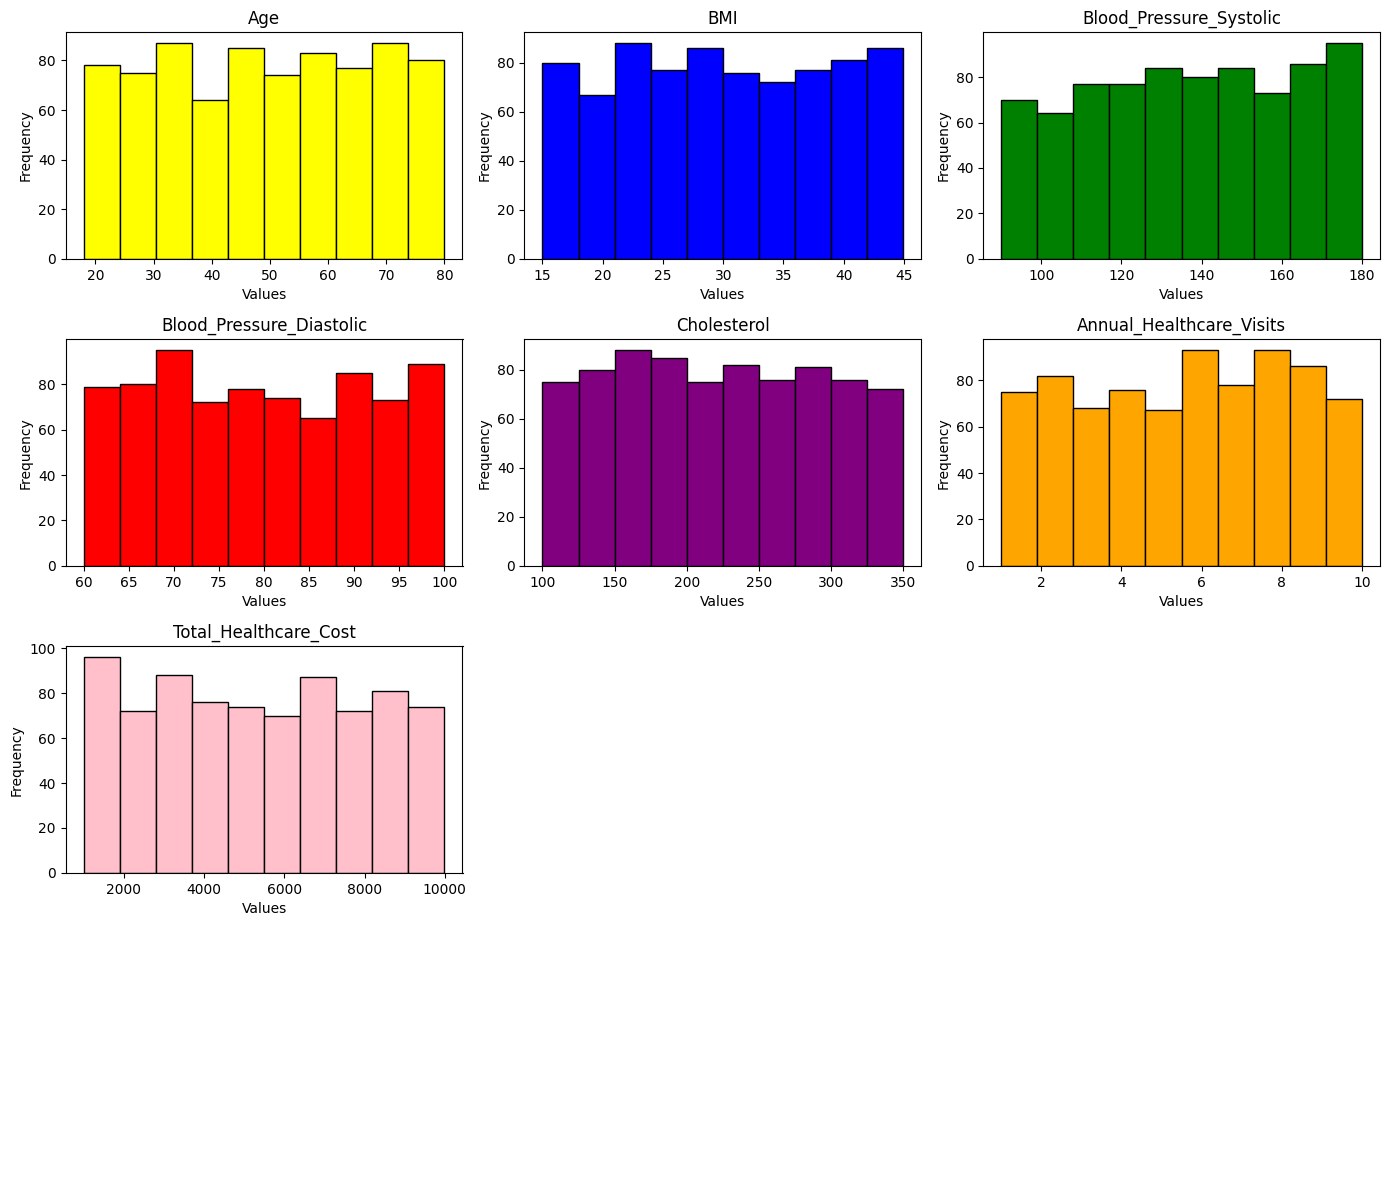

In [45]:
# Create an overlapping histogram of Age, BMI, Blood Pressure (Systolic and Diastolic), Cholesterol, Annual Healthcare Visits, Total Healthcare Cost

import matplotlib.pyplot as plt
import numpy as np

# Creating subplots with multiple histograms
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(14, 12))

# Flatten the 2D axes array for easier iteration if needed
axes = axes.flatten()

# Age
axes[0].hist(df['Age'], color='Yellow', edgecolor='black')
axes[0].set_title('Age')

# BMI
axes[1].hist(df['BMI'], color='Blue', edgecolor='black')
axes[1].set_title('BMI')

# Blood_Pressure_Systolic
axes[2].hist(df['Blood_Pressure_Systolic'], color='Green', edgecolor='black')
axes[2].set_title('Blood_Pressure_Systolic')

# Blood_Pressure_Diastolic
axes[3].hist(df['Blood_Pressure_Diastolic'], color='Red', edgecolor='black')
axes[3].set_title('Blood_Pressure_Diastolic')

# Cholesterol
axes[4].hist(df['Cholesterol'], color='Purple', edgecolor='black')
axes[4].set_title('Cholesterol')

# Annual_Healthcare_Visits
axes[5].hist(df['Annual_Healthcare_Visits'], color='Orange', edgecolor='black')
axes[5].set_title('Annual_Healthcare_Visits')

# Total_Healthcare_Cost
axes[6].hist(df['Total_Healthcare_Cost'], color='Pink', edgecolor='black')
axes[6].set_title('Total_Healthcare_Cost')

# Turn off the remaining empty subplots
for i in range(7, len(axes)):
    axes[i].axis('off')

# Adding labels and title
for ax in axes[:7]: # Only for the plots with data
    ax.set_xlabel('Values')
    ax.set_ylabel('Frequency')

# Adjusting layout for better spacing
plt.tight_layout()

# Display the figure
plt.show()

### 2. Box Plots
- **Purpose:** To identify outliers and visualize the spread of of continuous data across categorical groups
- **Why:** Box plots allow you to compare medians, interquartile ranges, and detect outliers in numerical data grouped by categories

<Axes: xlabel='Exercise_Frequency', ylabel='Total_Healthcare_Cost'>

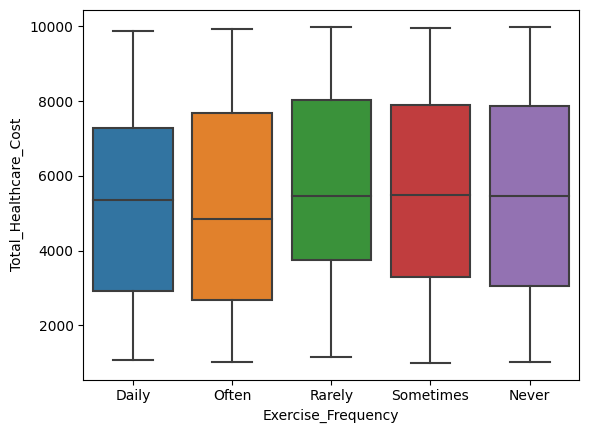

In [46]:
# Create a box plot comparing Exercise Frequency vs. Total Healthcare Cost
import seaborn as sns

sns.boxplot(y='Total_Healthcare_Cost', x='Exercise_Frequency', data=df)

# The box plot shows that the distribution between total healthcare cost is equal across all exercise frequencies.

<Axes: xlabel='Medication_Adherence', ylabel='Annual_Healthcare_Visits'>

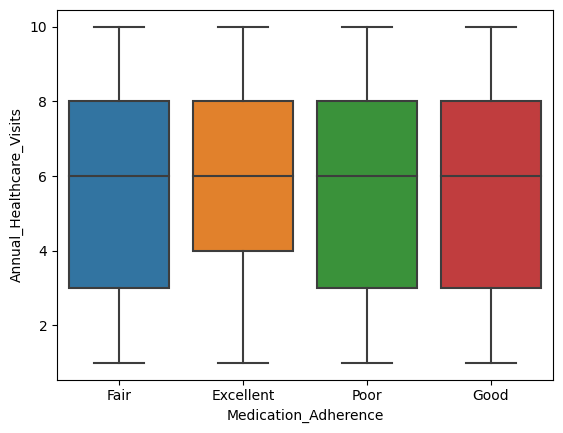

In [47]:
# Create a box plot comparing Medication Adherence vs. Annual Healthcare Visits
import seaborn as sns

sns.boxplot(y='Annual_Healthcare_Visits', x='Medication_Adherence', data=df)

# The box plot shows that the distribution between annual healthcare visits is equal across all medication adherence levels with a slightly smaller distribution of high adherence.

### 3. Bar Charts
- **Purpose:** To compare categorical variables
- **Why:** Bar charts help in comparing frequencies or proportions across different categories

c:\Program Files\Python310\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


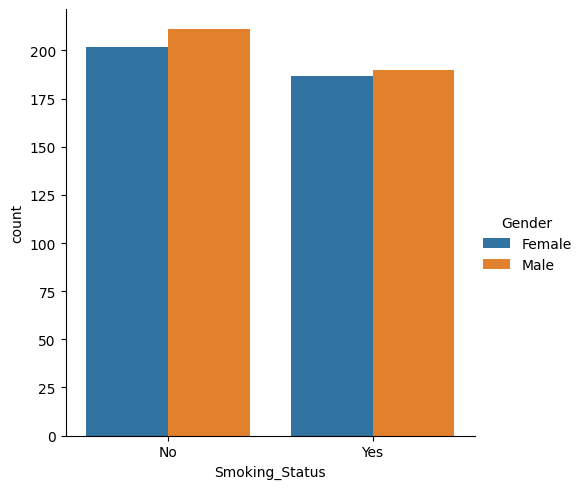

In [48]:
# Create a bar chart showing the distribution of Smoking Status by Gender (Categorical Count Plot)
sns.catplot(data=df, x='Smoking_Status', hue='Gender', kind='count')

c:\Program Files\Python310\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


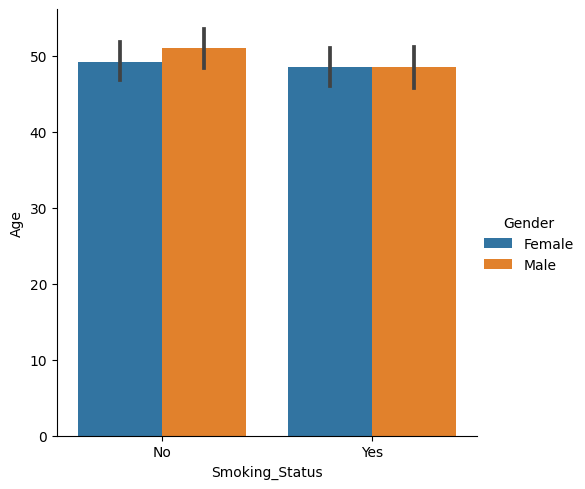

In [49]:
# Create a bar chart showing the distribution of Age vs. Smoking Status by Gender (Categorical by Numeric Bar Plot)
sns.catplot(data=df, x='Smoking_Status', y='Age', hue='Gender', kind='bar')

c:\Program Files\Python310\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


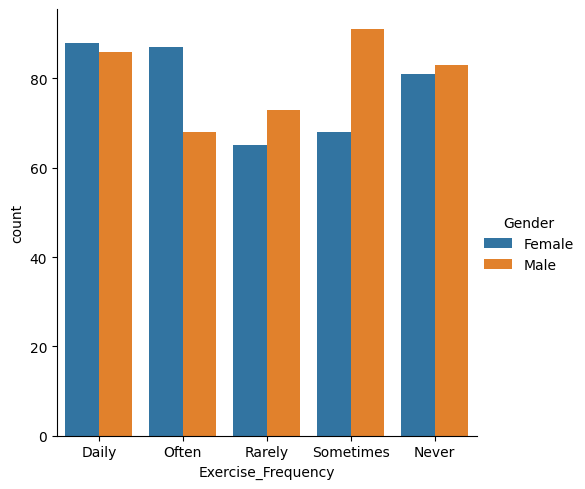

In [50]:
# Create a bar chart showing the distribution of Exercise Frequency by Gender (Categorical Count Plot)
sns.catplot(data=df, x='Exercise_Frequency', hue='Gender', kind='count')

c:\Program Files\Python310\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


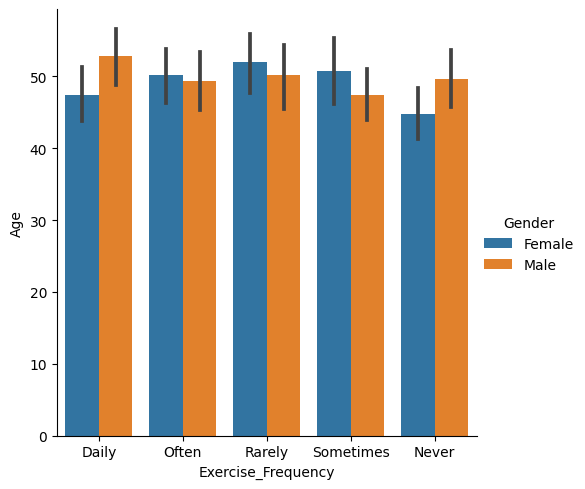

In [51]:
# Create a bar chart showing the distribution of Age vs. Exercise Frequency by Gender (Categorical by Numeric Bar Plot)
sns.catplot(data=df, x='Exercise_Frequency', y='Age', hue='Gender', kind='bar')

c:\Program Files\Python310\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


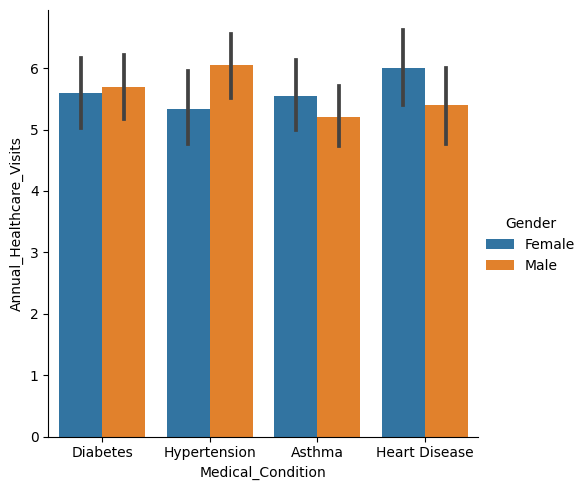

In [52]:
# Create a bar chart showing the distribution of Annual Healthcare Visits vs. Medical Condition by Gender (Categorical by Numeric Bar Plot)
sns.catplot(data=df, x='Medical_Condition', y='Annual_Healthcare_Visits', hue='Gender', kind='bar')

c:\Program Files\Python310\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


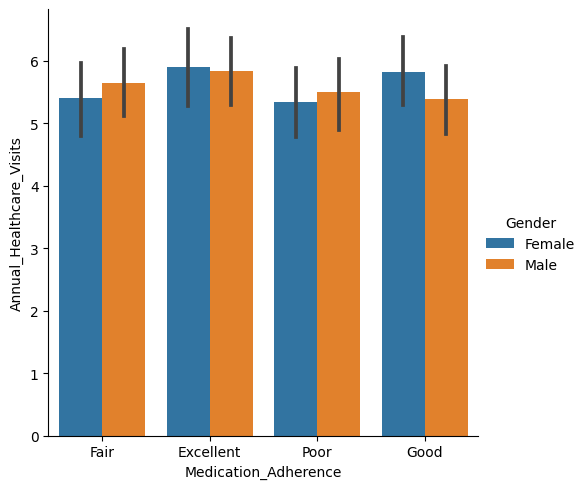

In [53]:
# Create a bar chart showing the distribution of Annual Healthcare Visits vs. Medication Adherence by Gender (Categorical by Numeric Bar Plot)
sns.catplot(data=df, x='Medication_Adherence', y='Annual_Healthcare_Visits', hue='Gender', kind='bar')

c:\Program Files\Python310\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


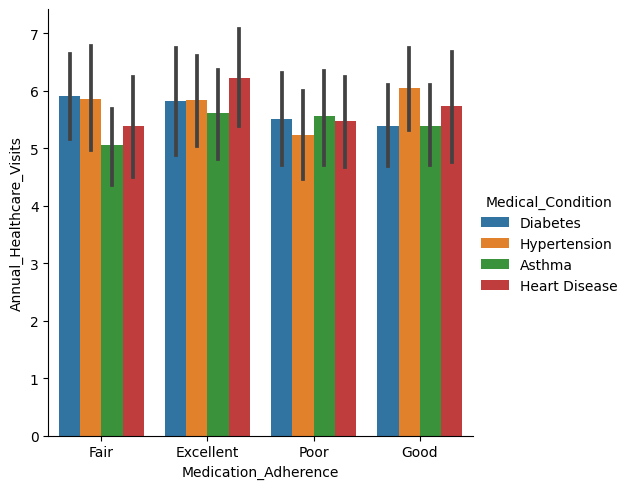

In [54]:
# Create a bar chart showing the distribution of Annual Healthcare Visits vs. Medication Adherence by Medical Condition (Categorical by Numeric Bar Plot)
sns.catplot(data=df, x='Medication_Adherence', y='Annual_Healthcare_Visits', hue='Medical_Condition', kind='bar')

### 4. Correlation Matrix with Heatmap
- **Purpose:** To visualize correlations between numeric variables
- **Why:** A heatmap makes it easy to spot strong positive or negative correlations between variables, highlighting which numeric values might influence others

In [55]:
# Create a correlation matrix
numeric_df = df.select_dtypes(include='number')
numeric_df.corr()

,Patient_ID,Age,BMI,Blood_Pressure_Systolic,Blood_Pressure_Diastolic,Cholesterol,Annual_Healthcare_Visits,Total_Healthcare_Cost
Patient_ID,1.000000,-0.048387,-0.028942,0.028874,-0.034232,0.010409,-0.005642,-0.006425
Age,-0.048387,1.000000,0.036375,-0.001305,0.074602,-0.001024,-0.002920,0.011515
BMI,-0.028942,0.036375,1.000000,-0.011253,0.012982,-0.028711,-0.001249,0.018129
Blood_Pressure_Systolic,0.028874,-0.001305,-0.011253,1.000000,0.047836,0.024001,-0.028097,0.001607
Blood_Pressure_Diastolic,-0.034232,0.074602,0.012982,0.047836,1.000000,0.020966,0.024817,-0.057582
Cholesterol,0.010409,-0.001024,-0.028711,0.024001,0.020966,1.000000,0.025649,-0.070015
Annual_Healthcare_Visits,-0.005642,-0.002920,-0.001249,-0.028097,0.024817,0.025649,1.000000,-0.078296
Total_Healthcare_Cost,-0.006425,0.011515,0.018129,0.001607,-0.057582,-0.070015,-0.078296,1.000000


<Axes: >

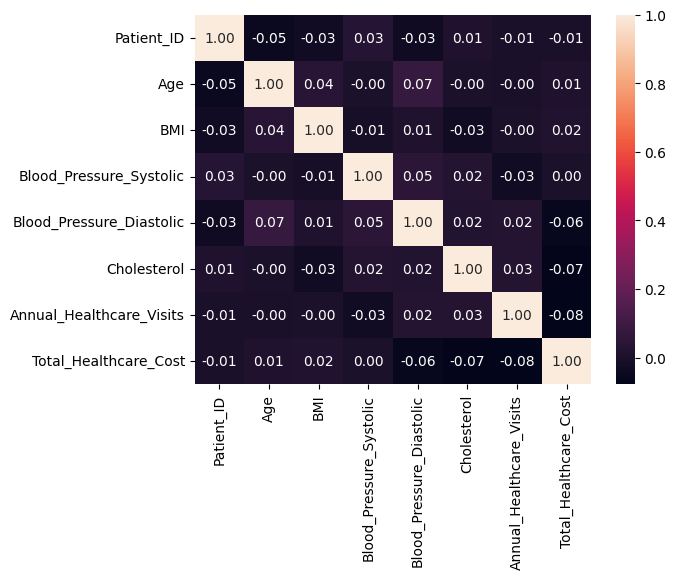

In [56]:
correlation_matrix = numeric_df.corr()

sns.heatmap(correlation_matrix, annot=True, fmt=".2f")

### 5. Scatter Plots
- **Purpose:** To visualize relationships between two continuous variables
- **Why:** Scatter plots show potential linear or non-linear relationships, helping to visually assess correlations.

<Axes: xlabel='Age', ylabel='Total_Healthcare_Cost'>

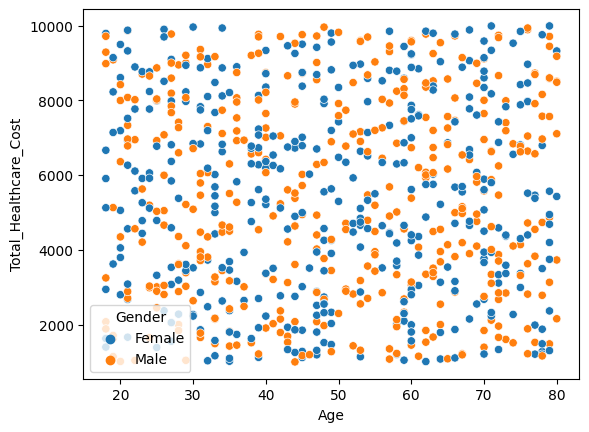

In [57]:
# Create a scatter plot of Age vs. Total Healthcare Cost
sns.scatterplot(x='Age', y='Total_Healthcare_Cost', 
                hue='Gender', data=df)

<Axes: xlabel='BMI', ylabel='Total_Healthcare_Cost'>

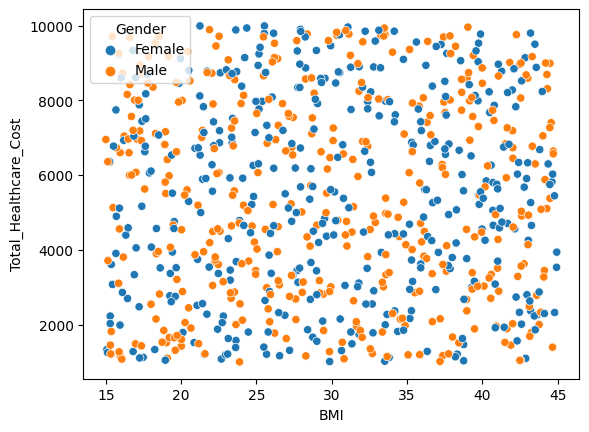

In [58]:
# Create a scatter plot of BMI vs. Annual Healthcare Cost
sns.scatterplot(x='BMI', y='Total_Healthcare_Cost',
                hue='Gender', data=df)

<Axes: xlabel='BMI', ylabel='Cholesterol'>

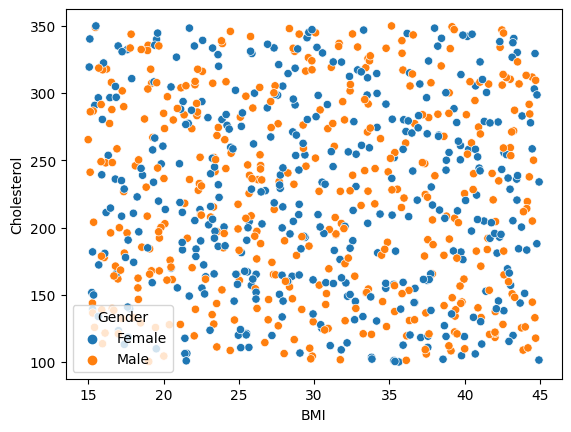

In [59]:
# Create a scatter plot of BMI vs. Cholesterol
sns.scatterplot(x='BMI', y='Cholesterol',
                hue='Gender', data=df)

<Axes: xlabel='Blood_Pressure_Systolic', ylabel='Annual_Healthcare_Visits'>

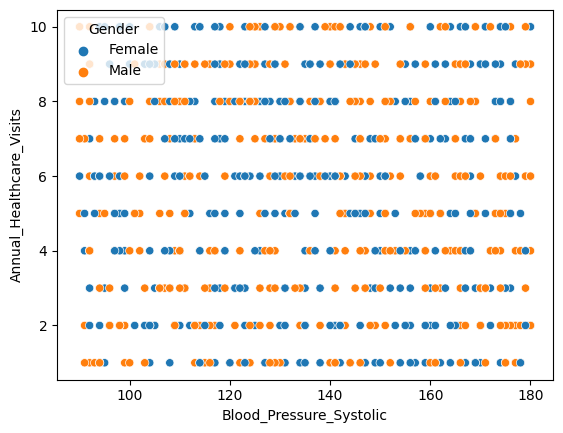

In [60]:
# Create a scatter plot of Blood Pressure vs. Healthcare Visits
sns.scatterplot(x='Blood_Pressure_Systolic', y='Annual_Healthcare_Visits',
                hue='Gender', data=df)

### 6. Stacked Bar Charts or Grouped Bar Charts
- **Purpose:** To compare the composition of categorical data across groups.
- **Why:** Stacked or grouped bar charts help compare how multiple categories are distributed across groups.

c:\Program Files\Python310\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


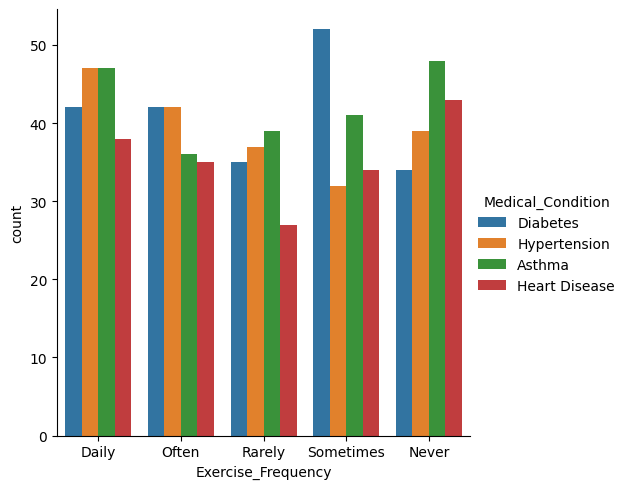

In [61]:
# Create a grouped bar chart of exercise frequency and medical conditions
sns.catplot(data=df, x='Exercise_Frequency', hue='Medical_Condition', kind='count')

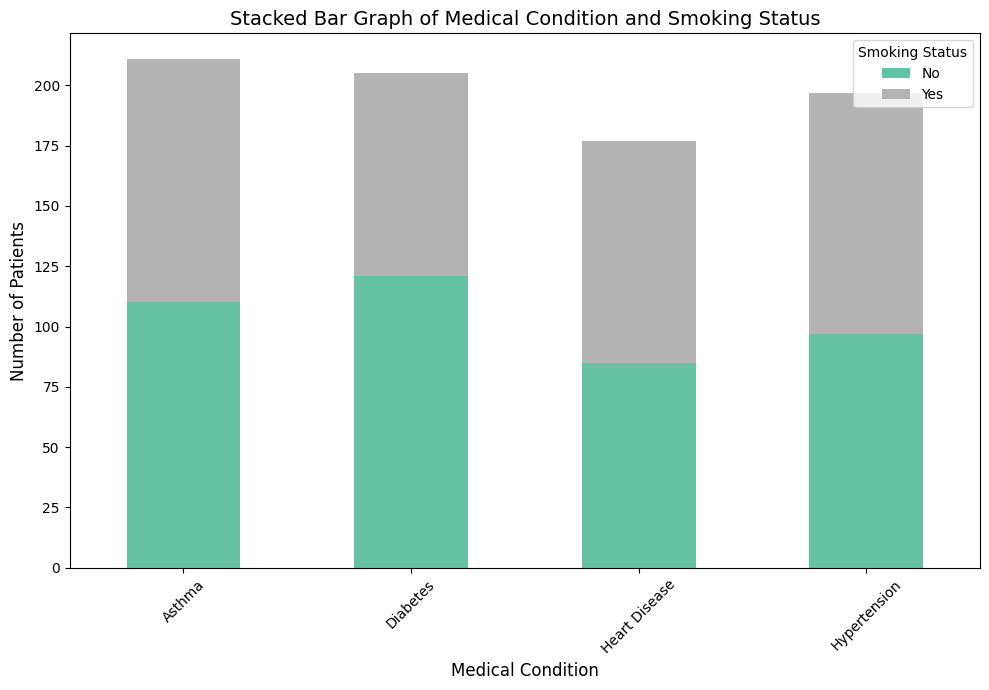

In [62]:
# Create a stacked bar chart of smoking status and medical conditions
# Create a crosstab to count occurrences of Medical_Condition and Smoking_Status
condition_smoking_crosstab = pd.crosstab(df['Medical_Condition'], df['Smoking_Status'])

# Plotting the stacked bar graph
condition_smoking_crosstab.plot(kind='bar', stacked=True, figsize=(10, 7), colormap='Set2')

# Adding labels and title
plt.title('Stacked Bar Graph of Medical Condition and Smoking Status', fontsize=14)
plt.xlabel('Medical Condition', fontsize=12)
plt.ylabel('Number of Patients', fontsize=12)
plt.legend(title='Smoking Status')
plt.xticks(rotation=45)

# Display the plot
plt.tight_layout()
plt.show()

### 7. Pie Charts or Donut Charts
- **Purpose:** To show proportions of a single categorical variable
- **Why:** Pie charts provide a quick visual of how categories are divided, though they are less precise than bar charts.

<Axes: ylabel='count'>

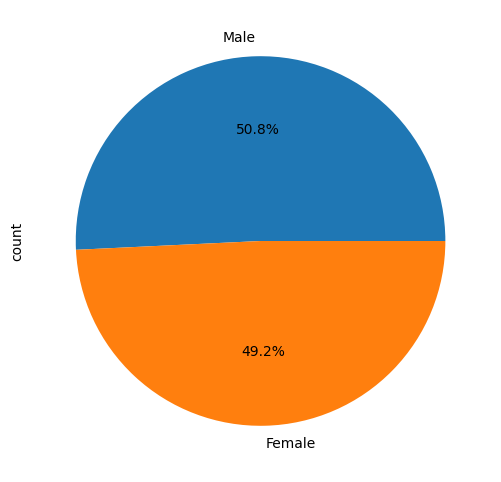

In [63]:
# Create a pie chart of gender distribution
df['Gender'].value_counts().plot(kind='pie', autopct='%1.1f%%', figsize=(6, 6))

<Axes: ylabel='count'>

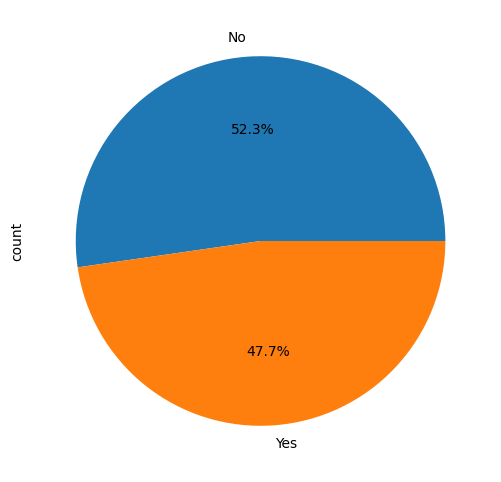

In [64]:
# Create a pie chart of smoking status
df['Smoking_Status'].value_counts().plot(kind='pie', autopct='%1.1f%%', figsize=(6, 6))

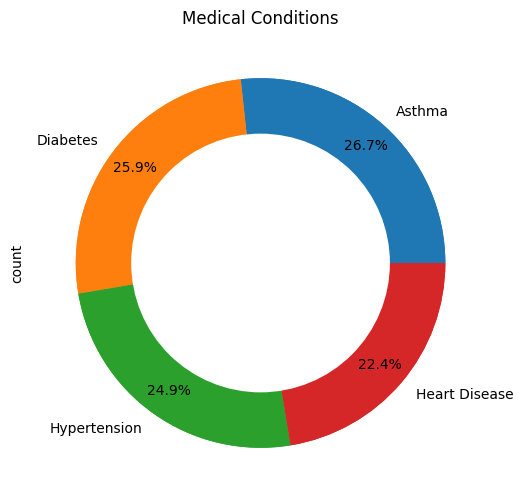

In [65]:
# Create a donut chart of medical conditions
df['Medical_Condition'].value_counts().plot(kind='pie', figsize=(6, 6))

# Pie Chart
plt.pie(df['Medical_Condition'].value_counts(),
        autopct='%1.1f%%', pctdistance=0.85)
 
# draw circle
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()
 
# Adding Circle in Pie chart
fig.gca().add_artist(centre_circle)
 
# Adding Title of chart
plt.title('Medical Conditions')
 
# Displaying Chart
plt.show()

### 8. Violin Plot
- **Purpose:** To visualize the distribution of the data and its density while comparing across categories.
- **Why:** Violin plots are useful when you want to see the distribution and density of continuous variables across different categories.

<Axes: xlabel='Exercise_Frequency', ylabel='Total_Healthcare_Cost'>

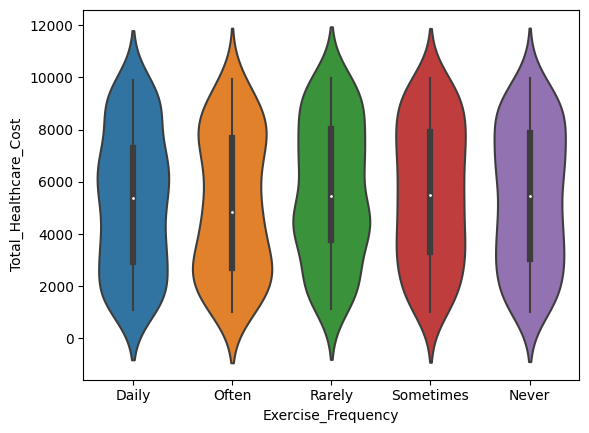

In [66]:
# Create a violin plot of total healthcare cost by exercise frequency
sns.violinplot(x='Exercise_Frequency', y='Total_Healthcare_Cost', data=df)

<Axes: xlabel='Medication_Adherence', ylabel='Total_Healthcare_Cost'>

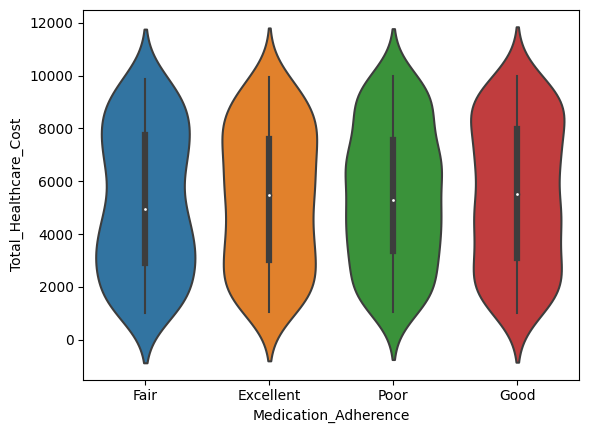

In [67]:
# Create a violin plot of total healthcare cost by Medication Adherence
sns.violinplot(x='Medication_Adherence', y='Total_Healthcare_Cost', data=df)

### 8. Pairplot (Scatterplot Matrix)
- **Purpose:** To visualize pairwise relationships in the dataset across several numeric variables
- **Why:** Pairplots help in understanding multiple variable relationships simultaneously, useful for detecting patterns or trends between pairs of continuous variables.

c:\Program Files\Python310\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


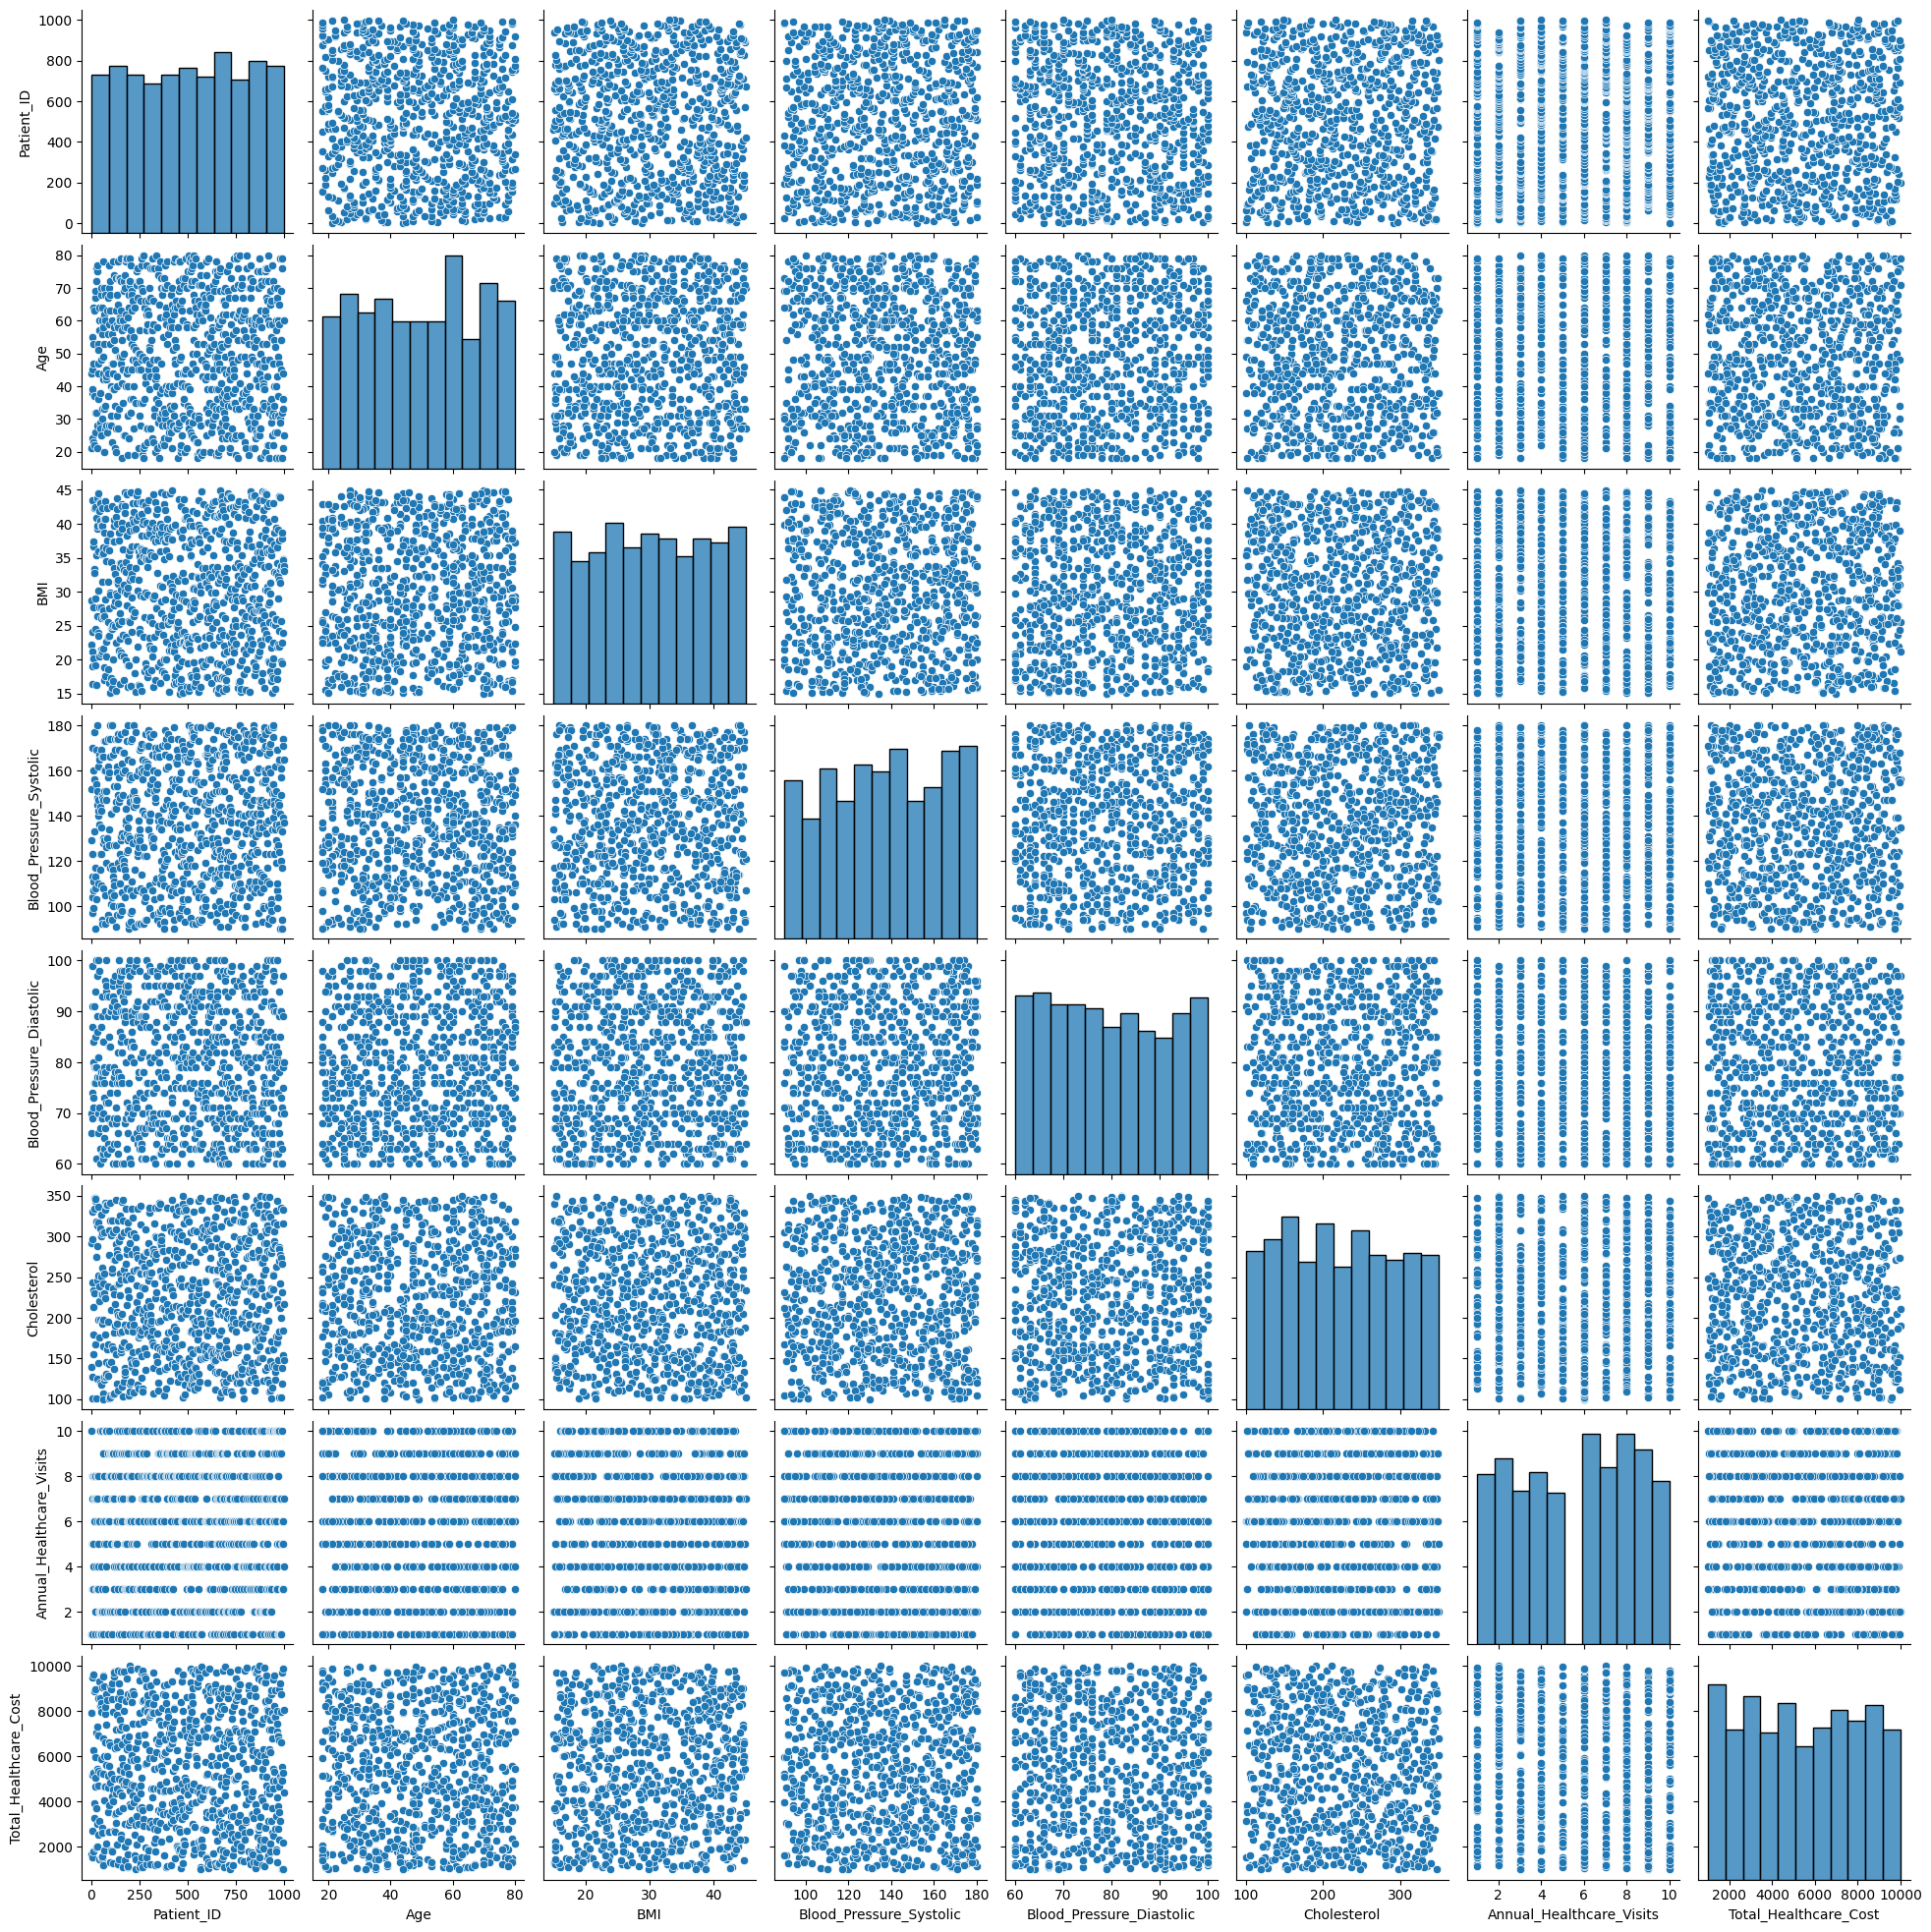

In [68]:
# Create a pairplot of all numeric columns
sns.pairplot(numeric_df)

# Part 4: Choosing Statistical Tests and Analysis Methods
- **Goal:** Identify relationship between one or more independent variables and a dependent variable.

## Step 1: Regression Analysis
